In [1]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import cv2
import keras
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/Users/madhurabhagat/Downloads/archive/train/train.csv")
data.head(5)

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [3]:
data["category"].value_counts()

category
1    2120
5    1217
2    1167
3     916
4     832
Name: count, dtype: int64

In [4]:
data["category"]=data["category"].replace({'Cargo': 1,
              'Military': 2,
              'Carrier': 3,
              'Cruise': 4,
              'Tankers': 5})

In [5]:
image_dir = "/Users/madhurabhagat/Downloads/archive/train/images/"

In [6]:
data["category"]=data["category"].astype(str)

In [7]:
img_size=224
batch_size=32

In [8]:
datagen=ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

In [9]:
train_generator=datagen.flow_from_dataframe(
    dataframe=data,
    directory=image_dir,
    x_col="image",
    y_col="category",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)
val_generator = datagen.flow_from_dataframe(
    dataframe=data,
    directory=image_dir,
    x_col="image",
    y_col="category",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 5002 validated image filenames belonging to 5 classes.
Found 1250 validated image filenames belonging to 5 classes.


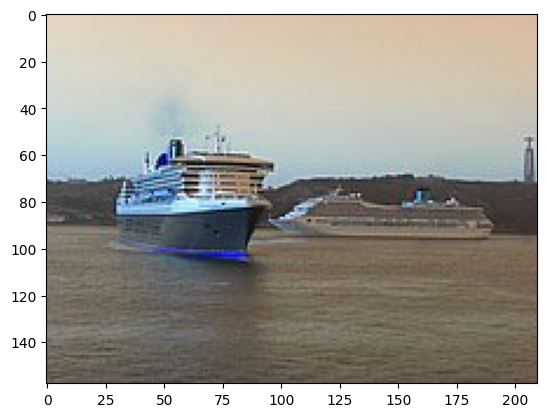

In [10]:
img_path="/Users/madhurabhagat/Downloads/archive/train/images/1001524.jpg"
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [11]:
img.shape

(158, 210, 3)

In [12]:
model=Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(img_size,img_size,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(5,activation="softmax"))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,796,677 (182.33 MB)

 Trainable params: 47,796,677 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5, 
    verbose=1
)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.3564 - loss: 4.0031 - val_accuracy: 0.5744 - val_loss: 1.1122
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.6776 - loss: 0.8614 - val_accuracy: 0.5640 - val_loss: 1.1403
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.8344 - loss: 0.4778 - val_accuracy: 0.6072 - val_loss: 1.0565
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9488 - loss: 0.1717 - val_accuracy: 0.6496 - val_loss: 1.3409
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9843 - loss: 0.0697 - val_accuracy: 0.6224 - val_loss: 1.5567


In [16]:
loss,accuracy=model.evaluate(val_generator,steps=val_generator.samples // batch_size)

39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.6204 - loss: 1.6372


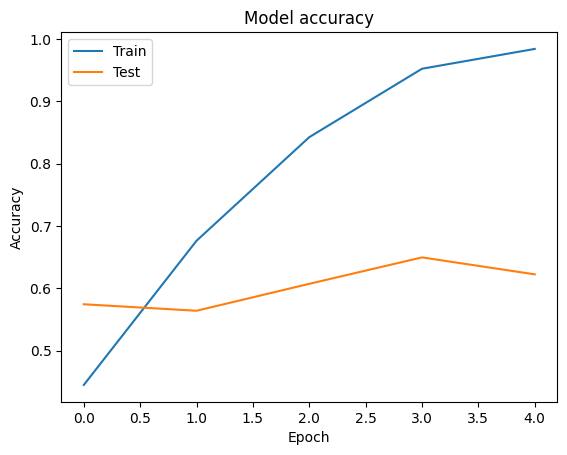

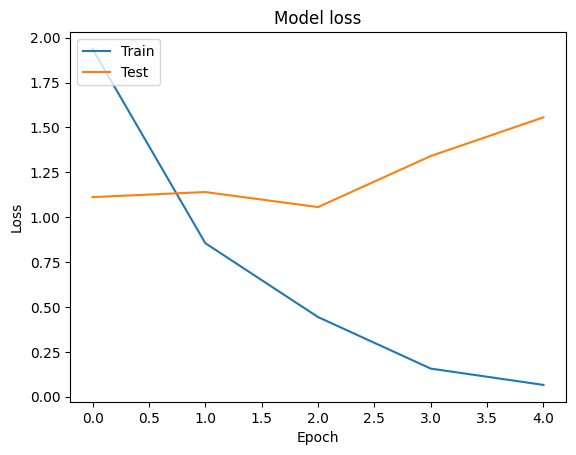

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

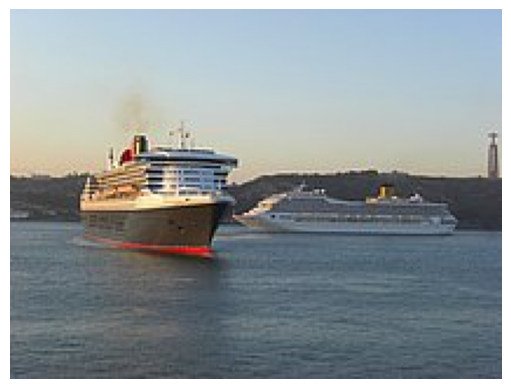

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted Label: Carrier


In [28]:
label_mapping = {
    1: "Cargo",
    2: "Military",
    3: "Carrier",
    4: "Cruise",
    5: "Tankers"
}
img_input = "/Users/madhurabhagat/Downloads/archive/train/images/1001524.jpg"
input_img = cv2.imread(img_input)

if input_img is None:
    print("Error: Image not found or could not be loaded.")
else:
    input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    plt.imshow(input_img_rgb)
    plt.axis('off')
    plt.show()
    img_size = model.input_shape[1]
    input_img_resize = cv2.resize(input_img_rgb, (img_size, img_size)) / 255.0
    img_reshaped = np.expand_dims(input_img_resize, axis=0)
    img_pred = model.predict(img_reshaped)
    img_pred_label = np.argmax(img_pred)
    class_name = label_mapping.get(img_pred_label, "Unknown")
    print("Predicted Label:", class_name)
